In [1]:
!pip install keras
!pip install tensorflow

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import keras.datasets

import numpy as np
from matplotlib import pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

In [2]:
def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N самплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape 
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class 
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

In [3]:
from keras.datasets import mnist

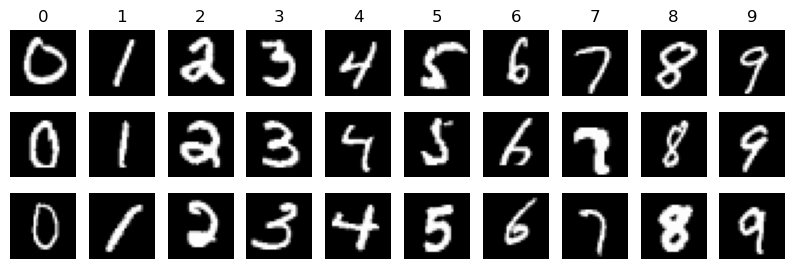

numpy.ndarray

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=3)
x=X_train[10]
type(x)

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
from keras.utils import np_utils

In [7]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [8]:
input_size = X_train[0].shape

In [23]:
model = Sequential()
model.add(Flatten(input_shape=input_size))

model.add(Dense(units=512, input_shape=input_size))
model.add(Activation('relu'))

model.add(Dense(units=10))
model.add(Activation('softmax'))

In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2019 - accuracy: 0.9401
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0795 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0525 - accuracy: 0.9834
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0373 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0266 - accuracy: 0.9913


In [27]:
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9785


[0.06813400983810425, 0.9785000085830688]

Посмотрим, как изменение количества эпох влияет на обучение/переобучение модели

In [32]:
model = Sequential()
model.add(Flatten(input_shape=input_size))

model.add(Dense(units=512, input_shape=input_size))
model.add(Activation('relu'))

model.add(Dense(units=10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2039 - accuracy: 0.9393
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0796 - accuracy: 0.9757
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0540 - accuracy: 0.9831
Epoch 4/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0371 - accuracy: 0.9876
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0271 - accuracy: 0.9908
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0220 - accuracy: 0.9925
Epoch 7/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 8/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 9/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 10/15
1875/1875 [==============================] - 19s 10m

In [33]:
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9806


[0.10226095467805862, 0.9805999994277954]

Увеличение количества эпох ведёт к переобучению